# Does Fandango Inflate Movie Ratings? 

In 2015 a data journalist named Walt Hickey analyzed movie ratings on Fandango and compared them to other movie ratings on IMDB, Rotten Tomatoes, and Metacritic.  It was found that Fandango's movie ratings were inflated compared to the other websites.  It was also found that they rounded their ratings in a very odd way.  Almost all ratings were rounded up to the nearest half star and one movie was rounded from four stars to five stars.  Fandango said that these rounding oddities were bugs and would be fixed.  In this project we will analyze more recent data of movie reviews from 2016 and 2017 to see if anything has changed about Fandango's movie ratings.  An important thing to note in this project in the datasets is that norm in fandango_score_comparison columns means that the movie ratings have been normalized to the 5 star Fandango rating.  In movie_ratings.csv this is represented by a leading n\_or nr\_ if it is rounded.     

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
before = pd.read_csv('fandango_score_comparison.csv')
before.sample(10)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
44,Kingsman: The Secret Service (2015),75,84,58,7.9,7.8,4.5,4.2,3.75,4.20,...,3.90,4.0,4.0,3.0,4.0,4.0,1054,272204,15205,0.3
67,Unfriended (2015),60,39,59,5.8,5.9,3.0,2.7,3.00,1.95,...,2.95,3.0,2.0,3.0,3.0,3.0,130,22348,2507,0.3
100,Jupiter Ascending (2015),26,40,40,4.5,5.5,3.5,3.4,1.30,2.00,...,2.75,1.5,2.0,2.0,2.5,3.0,503,105412,4122,0.1
55,Black or White (2015),39,68,45,7.9,6.6,4.5,4.2,1.95,3.40,...,3.30,2.0,3.5,2.5,4.0,3.5,24,4857,1862,0.3
84,Sinister 2 (2015),13,34,31,5.0,5.5,3.5,3.3,0.65,1.70,...,2.75,0.5,1.5,1.5,2.5,3.0,37,3200,973,0.2
80,Paper Towns (2015),55,57,56,6.2,6.9,4.0,3.8,2.75,2.85,...,3.45,3.0,3.0,3.0,3.0,3.5,51,14156,1750,0.2
15,Taken 3 (2015),9,46,26,4.6,6.1,4.5,4.1,0.45,2.30,...,3.05,0.5,2.5,1.5,2.5,3.0,240,104235,6757,0.4
106,Cake (2015),49,47,49,6.4,6.5,3.5,3.4,2.45,2.35,...,3.25,2.5,2.5,2.5,3.0,3.5,44,19627,482,0.1
124,Home (2015),45,65,55,7.3,6.7,4.5,4.4,2.25,3.25,...,3.35,2.5,3.5,3.0,3.5,3.5,177,41158,7705,0.1
140,Inside Out (2015),98,90,94,8.9,8.6,4.5,4.5,4.90,4.50,...,4.30,5.0,4.5,4.5,4.5,4.5,807,96252,15749,0.0


In [2]:
after = pd.read_csv('movie_ratings_16_17.csv')
after.sample(10)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
31,Captain America: Civil War,2016,75,7.9,90,89,4.5,3.75,3.95,4.50,4.45,4.0,4.0,4.5,4.5
159,The Accountant,2016,51,7.4,51,78,4.5,2.55,3.70,2.55,3.90,2.5,3.5,2.5,4.0
193,The Secret Life of Pets,2016,61,6.6,74,63,4.0,3.05,3.30,3.70,3.15,3.0,3.5,3.5,3.0
19,Beauty and the Beast,2017,65,7.8,70,86,4.5,3.25,3.90,3.50,4.30,3.0,4.0,3.5,4.5
157,The 5th Wave,2016,33,5.2,16,38,3.5,1.65,2.60,0.80,1.90,1.5,2.5,1.0,2.0
88,Keeping Up with the Joneses,2016,34,5.8,19,38,3.5,1.70,2.90,0.95,1.90,1.5,3.0,1.0,2.0
24,Blair Witch,2016,47,5.1,35,30,3.0,2.35,2.55,1.75,1.50,2.5,2.5,2.0,1.5
65,Hacksaw Ridge,2016,71,8.2,87,92,4.5,3.55,4.10,4.35,4.60,3.5,4.0,4.5,4.5
185,The LEGO Batman Movie,2017,75,7.6,91,83,4.5,3.75,3.80,4.55,4.15,4.0,4.0,4.5,4.0


In [3]:
fan2015 = before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue',
                  'Fandango_votes', 'Fandango_Difference']].copy()
fan2016 = after[after['year'] == 2016][['movie', 'year', 'fandango']].copy()

The population of interest for this project is randomly sampled movies from 2015 and randomly sampled movies from 2016 and 2017.  The data used in Hickey's analysis was on movies from 2015 that had at least 30 reviews on Fandango.  The data for movies from 2016 and 2017 was the top 214 most popular movies by votes.  Both of these are not randomly sampled and are unlikely to represent the population we want to describe.   

# Popular Movies 

Since the data we have cannot be used to analyze if Fandango's ratings have changed since 2015, we either need to get new data or tweak our goal.  If we tweak our goal to compare Fandango's ratings of popular movies from 2015 and from 2016, we can see if Fandango's rating of popular movies from 2015 differs from 2016.  Since Hickey used 30 reviews or more on fandango as a qualifier for his analysis we will check to see if the "popular" movies from 2016 also have 30 ratings or more 

In [4]:
a2016 = after[after['year'] == 2016].copy()
a2016.sample(5)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
128,Our Kind of Traitor,2016,57,6.2,71,51,3.5,2.85,3.10,3.55,2.55,3.0,3.0,3.5,2.5
66,"Hail, Caesar!",2016,72,6.3,86,44,2.5,3.60,3.15,4.30,2.20,3.5,3.0,4.5,2.0
108,Mechanic: Resurrection,2016,38,5.6,29,41,4.0,1.90,2.80,1.45,2.05,2.0,3.0,1.5,2.0
6,A Street Cat Named Bob,2016,54,7.4,77,79,4.5,2.70,3.70,3.85,3.95,2.5,3.5,4.0,4.0
130,Patriots Day,2016,69,7.5,80,88,4.5,3.45,3.75,4.00,4.40,3.5,4.0,4.0,4.5


As of 2020 the movie ratings posted on fandango is the Rotten Tomatoes critic and audience score.  In order to go through with this analysis, me must assume that all the "popular" movies from 2016 had more than 30 reviews on fandango's old system.  I would expect the most popular movies in theaters to get over that many reviews anyways so it does not seem too farfetched to make that assumption.   

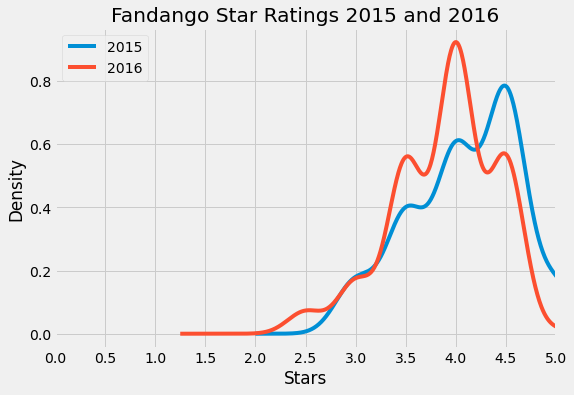

In [5]:
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.title('Fandango Star Ratings 2015 and 2016')

plt.xlim(0, 5)
plt.xticks(np.arange(start = 0, stop = 5.1, step = 0.5))
plt.xlabel('Stars')

fan2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8, 5.5))

fan2016['fandango'].plot.kde(label = '2016', legend = True)

plt.legend(loc = 'upper left')
plt.show()

Both of these plots are negatively skewed.  They have very similar shapes that curve in similar locations.  It looks there is evidence that the ratings in 2016 are lower than in 2015.  The curve for 2016 looks similar to the curve from 2015, but is shifted to the left by 0.5 stars.  In order to make any definitive conclusions we would need to compare these findings to other sites.  It is possible that movies in 2016 were worse than in 2015.   

In [6]:
freq2015 = fan2015['Fandango_Stars'].value_counts(normalize = True).sort_index()*100
freq2015.apply(round, args = (1,))

3.0     8.2
3.5    18.5
4.0    28.1
4.5    37.7
5.0     7.5
Name: Fandango_Stars, dtype: float64

In [7]:
freq2016 = fan2016['fandango'].value_counts(normalize = True).sort_index()*100
freq2016.apply(round, args = (1,))

2.5     3.1
3.0     7.3
3.5    24.1
4.0    40.3
4.5    24.6
5.0     0.5
Name: fandango, dtype: float64

Examining the frequency table tells a similar story.  The minimum value for 2016 is 2.5 compared to 3.0 for 2015.  In 2015 7.5% of the population had a rating of 5.0 when in 2016 it is down to 0.5%.  In 2015 37.7 of movies had a rating of 4.5 stars compared to 24.6 in 2016.  However, in 2015 28.1% of the population received a rating of 4.0 while in 2016 40.3% of the movies had a 4.0 rating.  The direction of the difference isn't immediately clear, but it is clear that less movies are scoring top ratings in 2016 than in 2015.   

In [8]:
mean2015 = fan2015['Fandango_Stars'].mean()
mean2016 = fan2016['fandango'].mean()
print('2015 mean:', mean2015)
print('2016 mean:', mean2016)

2015 mean: 4.089041095890411
2016 mean: 3.887434554973822


In [9]:
median2015 = fan2015['Fandango_Stars'].median()
median2016 = fan2016['fandango'].median()
print('2015 median:', median2015)
print('2016 median:', median2016)

2015 median: 4.0
2016 median: 4.0


In [10]:
mode2015 = fan2015['Fandango_Stars'].mode()
mode2016 = fan2016['fandango'].mode()
print('2015 mode:', mode2015[0])
print('2016 mode:', mode2016[0])

2015 mode: 4.5
2016 mode: 4.0


Comparing the metrics, it is clear that the Fandango movie ratings in 2016 are lower than the ratings in 2015.  The mean is 0.2 stars lower in 2016 than in 2015 this is a small difference.  They both share the same median of 4.0 stars, and the mode in 2016 is 4.0 compared to 4.5 in 2015.   

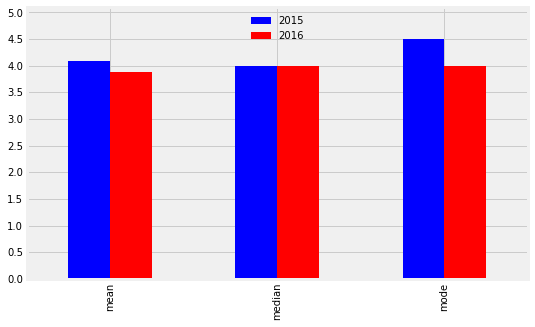

In [11]:
%matplotlib inline
metrics = pd.DataFrame([[mean2015, mean2016],
                        [median2015, median2016],
                        [mode2015[0], mode2016[0]]],
                      index = ['mean', 'median', 'mode'],
                      columns = ['2015', '2016'])
metrics.plot.bar(color = ['blue', 'red'], figsize = (8,5))
plt.ylim(0.0,5.1)
plt.yticks(np.arange(0,5.1,.5))
plt.legend(loc = 9, framealpha = 0)
plt.show()

It is clear that in 2016 the ratings on Fandango are lower than they were in 2015.  The kernel density plot showed the distribution of ratings on the higher end were lower in 2016 than in 2015.  The same story can be said for the mean and mode.  With a difference in the mean of 0.2 this difference could be from fixing their rounding bug from before.  Instead of rounding to the next highest half star the rating could now be rounded to the nearest half star rating.  It is impossible to confirm this theory however because after the bug was found in 2015 the website no longer displayed the unrounded rating for the movies.  Another possibility is that movies in 2016 were received worse by audiences than movies in 2015.  The next step is to compare the data of movie ratings of 2016 for all movie rating aggregators to the 2015 graph 

# Comparing 2015 and 2016

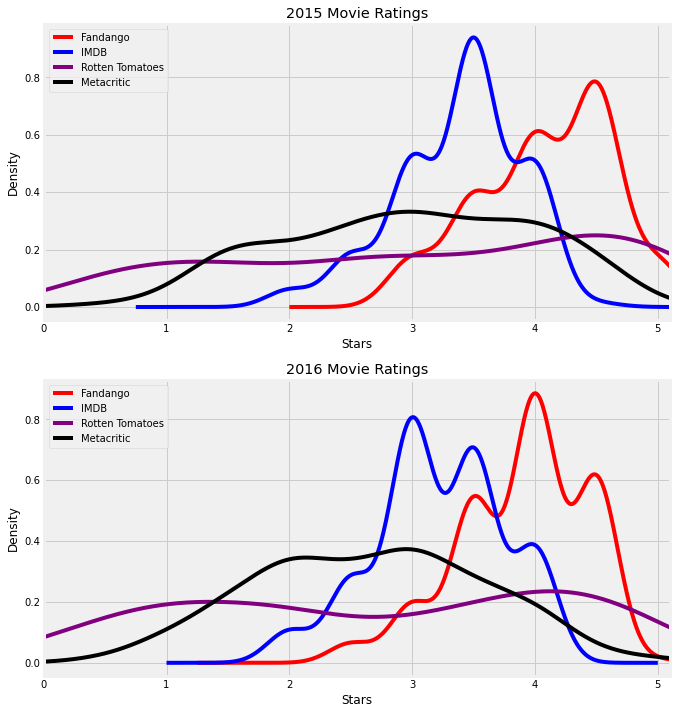

In [12]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (10,12))
ax1.set_xlim(0, 5.1)
ax2.set_xlim(0, 5.1)

before['Fandango_Stars'].plot.kde(ax = ax1, color = 'Red', label = 'Fandango')

before['IMDB_norm_round'].plot.kde(ax = ax1, color = 'blue', label = 'IMDB')

before['RT_norm_round'].plot.kde(ax = ax1, color = 'purple', label = 'Rotten Tomatoes')

before['Metacritic_norm_round'].plot.kde(ax = ax1, color = 'black', label = 'Metacritic')

ax1.legend(loc = 'upper left', shadow = False)
ax1.set_title('2015 Movie Ratings')
ax1.set_xlabel('Stars')

after['fandango'].plot.kde(ax = ax2, color = 'red',label = 'Fandango')

after['nr_imdb'].plot.kde(ax = ax2, color = 'blue', label = 'IMDB')

after['nr_tmeter'].plot.kde(ax = ax2, color = 'purple', label = 'Rotten Tomatoes')

after['nr_metascore'].plot.kde(ax = ax2, color = 'black', label = 'Metacritic')

ax2.set_title('2016 Movie Ratings')
ax2.set_xlabel('Stars')
ax2.legend(loc = 'upper left')
plt.show()

Comparing multiple movie rating aggregators over 2015 and 2016 still shows Fandango with a much higher density for top rated movies.  What earlier looked like a shift of a half of a star to left for Fandango doesn't look like much of a correction anymore when you compare it to another movie rating aggregator like IMDB.  For 2016 IMDB had most movies rated at three stars when normalized to Fandango's star rating system.  This is also a half star lower than in 2015.  Metacritic also shows a slight decrease in high scoring movies for 2016.  One important thing to note is that there are nearly no movies rated five stars on Fandango in 2016 which is a change from 2015.  This is interesting because Rotten Tomatoes has a similar level of a five star equivalent movie ratings for 2015 and 2016.  This may suggest that the rounding error for Fandango is gone.  It is also important to remember that these two datasets had two different qualifiers.  The data for the 2015 movies was for movies on Fandango that had at least 30 reviews.  The data for the 2016 movies was a subset of a larger dataset of the top 214 movies from 2016 and 2017.  These differences in qualifiers could be the source of these slight discrepancies between our plots.  In conclusion our data showed Fandango had a slight shift to the left in 2016 compared to 2015 resulting in slightly lower movie ratings however, Fandango still shows a higher rating on average than the other movie rating aggregators.   